# Accessing Water Data
- [Water Point Data Exchange Website](https://www.waterpointdata.org/)
- [API Guide and Dictionary](https://dev.socrata.com/foundry/data.waterpointdata.org/eqje-vguj)
- [Documentation](https://www.waterpointdata.org/docs/WPdx_User_Guide.pdf)

In [5]:
#importing relevant packages
%run /Users/thomasadler/Desktop/futuristic-platipus/notebooks/0-ta-packages.py

In [6]:
#fetching hidden api key from desktop stored under 'water_api_key'
%run /Users/thomasadler/Desktop/futuristic-platipus/keys.py

In [7]:
#defining working directory
filepath = '/Users/thomasadler/Desktop/capstone_docs/'

In [8]:
#setting API endpoint, dataset, key and client profile
socrata_domain = 'data.waterpointdata.org'
socrata_dataset_identifier = 'eqje-vguj'
socrata_token = os.environ.get(water_api_key)
client = Socrata(socrata_domain, socrata_token, timeout=10)

The goal is to access every water point recorded in Uganda and their associated information.

In [9]:
#creating query to fetch Uganda water points, all columns included
water_uganda_query = """
select
    *
where
    clean_country_name = 'Uganda'
limit
    200000
"""

In [10]:
#query dataset and store in dataframe
results = client.get(socrata_dataset_identifier, query=water_uganda_query)
water_df = pd.DataFrame.from_records(results)

In [24]:
#keep raw dataset untouched
uganda_water_df=water_df.copy()

In [25]:
#short look at data
uganda_water_df.tail()

,row_id,source,lat_deg,lon_deg,report_date,status_id,water_tech_clean,_water_tech_category,facility_type,clean_country_name,...,notes,rehab_priority,photo_lnk,lat_deg_original,lon_deg_original,fecal_coliform_presence,pay,scheme_id,orig_lnk,fecal_coliform_value
108252,270292,youthmappers,2.8520073,32.3231249,2022-05-18T00:00:00.000,Yes,Hand Pump,Hand Pump,Improved,Uganda,...,ngom_rom,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN
108253,421099,Water4,0.783063923,33.426149078,2022-04-27T00:00:00.000,Unknown,NaN,NaN,Improved,Uganda,...,NaN,176,https://api.mwater.co/v3/images/e6a1c51282e440...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108254,269987,youthmappers,2.8824498,32.2743901,2022-05-23T00:00:00.000,Yes,Hand Pump,Hand Pump,Improved,Uganda,...,ayac,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN
108255,270258,youthmappers,2.7894498,32.3490701,2022-05-19T00:00:00.000,Yes,Tapstand,Tapstand,Improved,Uganda,...,gulu_ptc,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN
108256,419716,Water4,0.784164132,33.516908912,2022-06-17T00:00:00.000,Yes,NaN,NaN,Improved,Uganda,...,NaN,88,https://api.mwater.co/v3/images/6617ff9975f349...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#looking at column datatypes
uganda_water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108257 entries, 0 to 108256
Data columns (total 67 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   row_id                     108257 non-null  object
 1   source                     108257 non-null  object
 2   lat_deg                    108257 non-null  object
 3   lon_deg                    108257 non-null  object
 4   report_date                108257 non-null  object
 5   status_id                  108257 non-null  object
 6   water_tech_clean           25659 non-null   object
 7   _water_tech_category       25659 non-null   object
 8   facility_type              108257 non-null  object
 9   clean_country_name         108257 non-null  object
 10  clean_adm1                 108257 non-null  object
 11  clean_adm2                 108257 non-null  object
 12  clean_adm3                 108257 non-null  object
 13  clean_adm4                 108257 non-null  

We exclude columns which have already been cleaned by the WPD team and stored in another "clean" column. We also exclude columns with links and urls. 

In [26]:
#drop irrelevant columns
uganda_water_df_clean=pd.DataFrame(uganda_water_df.drop(columns=['activity_id', 'adm1','adm2','adm3','country_id',\
                                                    'country_name','status','water_source','management',\
                                                    'water_tech','orig_lnk','photo_lnk','data_lnk',\
                                                    'public_data_source','converted','created_timestamp',\
                                                    'days_since_report','updated']))

#check current columns
uganda_water_df_clean.columns

Index(['row_id', 'source', 'lat_deg', 'lon_deg', 'report_date', 'status_id',
       'water_tech_clean', '_water_tech_category', 'facility_type',
       'clean_country_name', 'clean_adm1', 'clean_adm2', 'clean_adm3',
       'clean_adm4', 'distance_to_primary', 'distance_to_secondary',
       'distance_to_tertiary', 'distance_to_city', 'distance_to_town',
       'usage_cap', 'is_urban', 'staleness_score', 'is_latest', 'location_id',
       'cluster_size', 'clean_country_id', 'new_georeferenced_column_',
       'lat_lon_deg', 'count', 'water_source_clean', 'water_source_category',
       'wpdx_id', 'install_year', 'management_clean', 'status_clean',
       'installer', 'served_population', 'local_population', 'crucialness',
       'pressure', 'subjective_quality', 'notes', 'rehab_priority',
       'lat_deg_original', 'lon_deg_original', 'fecal_coliform_presence',
       'pay', 'scheme_id', 'fecal_coliform_value'],
      dtype='object')

In [31]:
#checking contents of columns we want to convert to binary
print('fecal_coliform_presence distribution:',uganda_water_df_clean['fecal_coliform_presence'].value_counts())
print('is_latest distribution:',uganda_water_df_clean['is_latest'].value_counts())
print('is_urban distribution:',uganda_water_df_clean['is_urban'].value_counts())
print('status_id distribution:',uganda_water_df_clean['status_id'].value_counts())

fecal_coliform_presence distribution: 1.0    1035
0.0     275
Name: fecal_coliform_presence, dtype: int64
is_latest distribution: 1    96575
0    11682
Name: is_latest, dtype: int64
is_urban distribution: Series([], Name: is_urban, dtype: int64)
status_id distribution: 1    87016
0    21241
Name: status_id, dtype: int64


We assume that water points that have an unknown status, are not working.

In [28]:
#convert to binary
uganda_water_df_clean['fecal_coliform_presence']=uganda_water_df_clean['fecal_coliform_presence'].map({'Present': 1, 'Absent': 0})

uganda_water_df_clean['is_latest'] = uganda_water_df_clean['is_latest'].astype('int64')

uganda_water_df_clean['is_urban']=uganda_water_df_clean['is_urban'].map({True: 1, False: 0})

uganda_water_df_clean['status_id']=uganda_water_df_clean['status_id'].map({'Yes': 1, 'No': 0, 'Unknown': 0})

#check
uganda_water_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108257 entries, 0 to 108256
Data columns (total 49 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   row_id                     108257 non-null  object 
 1   source                     108257 non-null  object 
 2   lat_deg                    108257 non-null  object 
 3   lon_deg                    108257 non-null  object 
 4   report_date                108257 non-null  object 
 5   status_id                  108257 non-null  int64  
 6   water_tech_clean           25659 non-null   object 
 7   _water_tech_category       25659 non-null   object 
 8   facility_type              108257 non-null  object 
 9   clean_country_name         108257 non-null  object 
 10  clean_adm1                 108257 non-null  object 
 11  clean_adm2                 108257 non-null  object 
 12  clean_adm3                 108257 non-null  object 
 13  clean_adm4                 10

In [29]:
#convert to number
num_columns=['distance_to_city', 'distance_to_primary', 'lat_deg', 'lat_deg_original',\
             'lon_deg', 'lon_deg_original', 'distance_to_secondary', 'distance_to_tertiary',\
             'distance_to_town', 'fecal_coliform_value', 'cluster_size', 'count', 'crucialness',\
             'install_year', 'local_population', 'pressure',\
             'rehab_priority', 'served_population', 'staleness_score', 'usage_cap']

for col in num_columns:
    uganda_water_df_clean[[col]]=uganda_water_df_clean[[col]].astype('float32')

#check
uganda_water_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108257 entries, 0 to 108256
Data columns (total 49 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   row_id                     108257 non-null  object 
 1   source                     108257 non-null  object 
 2   lat_deg                    108257 non-null  float32
 3   lon_deg                    108257 non-null  float32
 4   report_date                108257 non-null  object 
 5   status_id                  108257 non-null  int64  
 6   water_tech_clean           25659 non-null   object 
 7   _water_tech_category       25659 non-null   object 
 8   facility_type              108257 non-null  object 
 9   clean_country_name         108257 non-null  object 
 10  clean_adm1                 108257 non-null  object 
 11  clean_adm2                 108257 non-null  object 
 12  clean_adm3                 108257 non-null  object 
 13  clean_adm4                 10

In [13]:
#convert to datetime
uganda_water_df_clean['report_date']=pd.to_datetime(uganda_water_df_clean['report_date'])
uganda_water_df_clean['install_year']=pd.to_datetime(uganda_water_df_clean['install_year'].astype('float32'), format='%Y')

#check
print(uganda_water_df_clean['report_date'])
print(uganda_water_df_clean['install_year'])


0        2005-09-07
1        2005-09-07
2        2005-09-07
3        2005-09-07
4        2005-09-07
            ...    
108243   2022-05-21
108244   2022-09-05
108245   2022-05-17
108246   2022-05-19
108247   2022-05-23
Name: report_date, Length: 108248, dtype: datetime64[ns]
0               NaT
1               NaT
2               NaT
3               NaT
4               NaT
            ...    
108243          NaT
108244   2022-01-01
108245   2020-01-01
108246          NaT
108247          NaT
Name: install_year, Length: 108248, dtype: datetime64[ns]


In [30]:
#select columns with string
str_columns = list(uganda_water_df_clean.select_dtypes("object").columns)

#remove special characters from string columns
for col in str_columns:
    uganda_water_df_clean[col].str.replace('[^\w\s]', '')

/var/folders/6z/_t24rnpd7yz5xg2pw_2t_s6m0000gn/T/ipykernel_85037/3847936817.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  uganda_water_df_clean[col].str.replace('[^\w\s]', '')


In [15]:
#percentage of NA values by columns
uganda_water_df_clean.isna().mean()*100

row_id                         0.000000
source                         0.000000
lat_deg                        0.000000
lon_deg                        0.000000
report_date                    0.000000
status_id                      0.000000
water_tech_clean              76.299793
_water_tech_category          76.299793
facility_type                  0.000000
clean_country_name             0.000000
clean_adm1                     0.000000
clean_adm2                     0.000000
clean_adm3                     0.000000
clean_adm4                     0.000000
distance_to_primary            0.000000
distance_to_secondary          0.000000
distance_to_tertiary           0.000000
distance_to_city               0.000000
distance_to_town               0.000000
usage_cap                      0.019400
is_urban                     100.000000
staleness_score                0.000000
is_latest                      0.000000
location_id                    0.000000
cluster_size                   0.000000


We decide to drop columns which have more than 50% of its values that are missing. We deem these columns not be of good enough quality to be analysed.

In [16]:
#remove columsn where >50% are missing values, using the thresh parameter (0.5)
uganda_water_df_clean = uganda_water_df_clean.dropna(axis=1, thresh=0.5*len(uganda_water_df_clean))

#check
uganda_water_df_clean.isna().mean()*100

row_id                        0.000000
source                        0.000000
lat_deg                       0.000000
lon_deg                       0.000000
report_date                   0.000000
status_id                     0.000000
facility_type                 0.000000
clean_country_name            0.000000
clean_adm1                    0.000000
clean_adm2                    0.000000
clean_adm3                    0.000000
clean_adm4                    0.000000
distance_to_primary           0.000000
distance_to_secondary         0.000000
distance_to_tertiary          0.000000
distance_to_city              0.000000
distance_to_town              0.000000
usage_cap                     0.019400
staleness_score               0.000000
is_latest                     0.000000
location_id                   0.000000
cluster_size                  0.000000
clean_country_id              0.000000
new_georeferenced_column_     0.000000
lat_lon_deg                   0.000000
count                    

The documentation informs us that this dataset is not supposed to have any duplicate columns or rows

In [17]:
#checking duplicate rows
#uganda_water_df_clean.duplicated().sum()

TypeError: unhashable type: 'dict'

In [ ]:
#checking duplicate rows
#uganda_water_df_clean.T.duplicated().sum()

Due to the small number of missing values in the `usage_cap` column, we decide to fill the missing values with the median value. We will hold off filling the remaining missing values as they are each missing around a fifth of their values, any decision made there will have a large impact on the dataset.

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


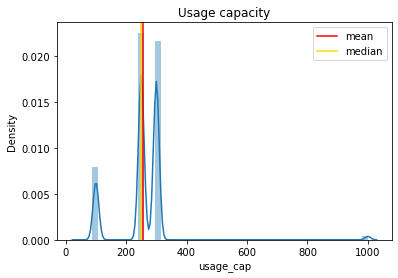

In [18]:
#showing distribution of value we want to inpute and where mean/median is situated

plt.figure()
sns.distplot(uganda_water_df_clean['usage_cap'])
plt.axvline(uganda_water_df_clean['usage_cap'].mean(), c='r', label='mean')
plt.axvline(uganda_water_df_clean['usage_cap'].median(), c='gold', label='median')

#change the limits of x to see where the majority of the values lie
#plt.xlim(0,400)

plt.legend()
plt.title('Usage capacity')
plt.show()    

In [19]:
#input median value to fillna
uganda_water_df_clean['usage_cap'] = uganda_water_df_clean['usage_cap'].fillna(uganda_water_df_clean['usage_cap'].median())

#check
uganda_water_df_clean.isna().mean()*100

row_id                        0.000000
source                        0.000000
lat_deg                       0.000000
lon_deg                       0.000000
report_date                   0.000000
status_id                     0.000000
facility_type                 0.000000
clean_country_name            0.000000
clean_adm1                    0.000000
clean_adm2                    0.000000
clean_adm3                    0.000000
clean_adm4                    0.000000
distance_to_primary           0.000000
distance_to_secondary         0.000000
distance_to_tertiary          0.000000
distance_to_city              0.000000
distance_to_town              0.000000
usage_cap                     0.000000
staleness_score               0.000000
is_latest                     0.000000
location_id                   0.000000
cluster_size                  0.000000
clean_country_id              0.000000
new_georeferenced_column_     0.000000
lat_lon_deg                   0.000000
count                    

In [22]:
#export to cleaned dataset to csv
uganda_water_df_clean.to_csv(filepath + 'uganda_water_df_clean.csv')